<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_02/Lecture_02/Office%20Hours/Post_Class_Copy_of_01_24_22_Week_2%2C_Day_2_Class_Notebook_Data_Cleaning%2BEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://course_report_production.s3.amazonaws.com/rich/rich_files/rich_files/2470/s300/cd-logo-blue-600x600.png" alt="Coding Dojo Logo" class="center" height="50">

# Data Cleaning

*Make a copy of this notebook to edit!*
```
File > Save a copy in Drive
```

We will use data on the Super Bowls. You can download the data [here](https://drive.google.com/file/d/1kWqIFO9LgVlMsYG9M9boRKCFiizpUB5o/view?usp=sharing).

</center>

**Why do we need to clean our data?**

> Garbage in, garbage out.

> Quality data beats fancy algorithms.

Overall, incorrect data is either removed, corrected, or imputed. ([*source*](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4))



~~**Mount Data**~~ 
- Use the filr URL below instead of mounting google drive. 

In [1]:
file_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSAwjsA-rwGlz_Bb0yIgC13scmhxQCjayvh-sp0v3lRMxejeem8ntBBcDpr4xbNNMiGzB8VGPKJzGJv/pub?output=csv"

**Import Libraries**

In [2]:
# Imports
import pandas as pd
import numpy as np

**Load Data & view first 5 rows**

In [3]:
# Load Data
sb = pd.read_csv(file_url)#,index_col=0)   
sb.head() #Always view your dataframe so you know it loaded correctly.

,Unnamed: 0,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,Losing Pts,MVP,Stadium,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,0,15-Jan-67,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,Kansas City Chiefs,10,Bart Starr,Memorial Coliseum,Los Angeles,California,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,14-Jan-68,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,Oakland Raiders,14,Bart Starr,Orange Bowl,Miami,Florida,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,12-Jan-69,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,7,Joe Namath,Orange Bowl,Miami,Florida,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,11-Jan-70,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,Minnesota Vikings,7,Len Dawson,Tulane Stadium,New Orleans,Louisiana,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,17-Jan-71,V,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,Dallas Cowboys,13,Chuck Howley,Orange Bowl,Miami,FL,3,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,NaN


## Irrelevant data

Irrelevant data is information that is unnecessary or unrelated to our task.

Typically, we want to remove this data - but **only if you are absolutely sure it is irrelevant**. When in doubt, consult a subject matter expert.

**What column seems unnecessary in this dataset? Drop it.**

In [4]:
sb.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# sb = sb.drop(columns=['Unnamed: 0'])

## Duplicate data

It is common that your data has data points that are repeated. Duplicates should be removed.

**Check for and remove any duplicates in this data.**

In [6]:
sb.duplicated().sum()

1

In [7]:
sb[sb.duplicated(keep=False)]

,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,Losing Pts,MVP,Stadium,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
20,25-Jan-87,XXI,101063,Phil Simms,Bill Parcells,New York Giants,39,John Elway,Dan Reeves,Denver Broncos,20,Phil Simms,Rose Bowl,Pasadena,California,19,Jerry Markbreit,Bob Boylston,Terry Gierke,Bob Beeks,Pat Mallette,Jim Poole,Gil Mace
52,25-Jan-87,XXI,101063,Phil Simms,Bill Parcells,New York Giants,39,John Elway,Dan Reeves,Denver Broncos,20,Phil Simms,Rose Bowl,Pasadena,California,19,Jerry Markbreit,Bob Boylston,Terry Gierke,Bob Beeks,Pat Mallette,Jim Poole,Gil Mace


In [8]:
sb.drop_duplicates(inplace=True)

In [9]:
sb.duplicated().sum()

0

## Data types

You want your data to all be correct data types. There may be errors in your data causing numeric types to be read in as objects or dates that need to be converted to datetime objects. Additionally, we may want to convert our categorical variables to numbers.

**Check the datatypes & validate that they are what they should be. The `Date` column should be a DateTime type - fix this using `pd.to_datetime()` if is not the case!**

In [10]:
sb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              52 non-null     object
 1   SB                52 non-null     object
 2   Attendance        52 non-null     int64 
 3   QB  Winner        52 non-null     object
 4   Coach Winner      52 non-null     object
 5   Winner            52 non-null     object
 6   Winning Pts       52 non-null     int64 
 7   QB Loser          52 non-null     object
 8   Coach Loser       52 non-null     object
 9   Loser             52 non-null     object
 10  Losing Pts        52 non-null     int64 
 11  MVP               52 non-null     object
 12  Stadium           52 non-null     object
 13  City              52 non-null     object
 14  State             52 non-null     object
 15  Point Difference  52 non-null     int64 
 16  Referee           48 non-null     object
 17  Umpire            

In [11]:
data_types = sb.dtypes
data_types

Date                object
SB                  object
Attendance           int64
QB  Winner          object
Coach Winner        object
Winner              object
Winning Pts          int64
QB Loser            object
Coach Loser         object
Loser               object
Losing Pts           int64
MVP                 object
Stadium             object
City                object
State               object
Point Difference     int64
Referee             object
Umpire              object
Head Linesman       object
Line Judge          object
Field Judge         object
Back Judge          object
Side Judge          object
dtype: object

In [12]:
str_cols = data_types[ data_types=='object']
str_cols

Date             object
SB               object
QB  Winner       object
Coach Winner     object
Winner           object
QB Loser         object
Coach Loser      object
Loser            object
MVP              object
Stadium          object
City             object
State            object
Referee          object
Umpire           object
Head Linesman    object
Line Judge       object
Field Judge      object
Back Judge       object
Side Judge       object
dtype: object

In [13]:
str_cols.index

Index(['Date', 'SB', 'QB  Winner', 'Coach Winner', 'Winner', 'QB Loser',
       'Coach Loser', 'Loser', 'MVP', 'Stadium', 'City', 'State', 'Referee',
       'Umpire', 'Head Linesman', 'Line Judge', 'Field Judge', 'Back Judge',
       'Side Judge'],
      dtype='object')

In [14]:
sb[str_cols.index]

,Date,SB,QB Winner,Coach Winner,Winner,QB Loser,Coach Loser,Loser,MVP,Stadium,City,State,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,15-Jan-67,I,Bart Starr,Vince Lombardi,Green Bay Packers,Len Dawson,Hank Stram,Kansas City Chiefs,Bart Starr,Memorial Coliseum,Los Angeles,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14-Jan-68,II,Bart Starr,Vince Lombardi,Green Bay Packers,Daryle Lamonica,John Rauch,Oakland Raiders,Bart Starr,Orange Bowl,Miami,Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-Jan-69,III,Joe Namath,Weeb Ewbank,New York Jets,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,Joe Namath,Orange Bowl,Miami,Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-Jan-70,IV,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,Joe Kapp,Bud Grant,Minnesota Vikings,Len Dawson,Tulane Stadium,New Orleans,Louisiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17-Jan-71,V,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,Craig Morton,Tom Landry,Dallas Cowboys,Chuck Howley,Orange Bowl,Miami,FL,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,NaN
5,16-Jan-72,VI,Roger Staubach,Tom Landry,Dallas Cowboys,Bob Griese,Don Shula,Miami Dolphins,Roger Staubach,Tulane Stadium,New Orleans,Louisiana,Jim Tunney,Joe Connell,Al Sabato,Art Holst,Bob Wortman,Ralph Vandenberg,NaN
6,14-Jan-73,VII,Bob Griese,Don Shula,Miami Dolphins,Bill Kilmer,George Allen,Washington Redskins,Jake Scott,Memorial Coliseum,Los Angeles,California,Tom Bell,Lou Palazzi,Tony Veteri,Bruce Alford,Tony Skover,Tom Kelleher,NaN
7,13-Jan-74,VIII,Bob Griese,Don Shula,Miami Dolphins,Fran Tarkenton,Bud Grant,Minnesota Vikings,Larry Csonka,Rice Stadium,Houston,Texas,Ben Dreith,Ralph Morcroft,Leo Miles,Jack Fette,Fritz Graf,Stan Javie,NaN
8,12-Jan-75,IX,Terry Bradshaw,Chuck Noll,Pittsburgh Steelers,Fran Tarkenton,Bud Grant,Minnesota Vikings,Franco Harris,Tulane Stadium,New Orleans,Louisiana,Bernie Ulman,Al Conway,Ed Marion,Bruce Alford,Dick Dolack,Ray Douglas,NaN
9,18-Jan-76,X,Terry Bradshaw,Chuck Noll,Pittsburgh Steelers,Roger Staubach,Tom Landry,Dallas Cowboys,Lynn Swann,Orange Bowl,Miami,Florida,Norm Schachter,Joe Connell,Leo Miles,Jack Fette,Bill O'Brien,Stan Javie,NaN


In [18]:
int("15-Jan-67"[-2:]) < 70

True

In [21]:
old_rows = sb['Date'].apply(lambda x: int(x[-2:]) > 21 )
sb[old_rows]

,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,Losing Pts,MVP,Stadium,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,15-Jan-67,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,Kansas City Chiefs,10,Bart Starr,Memorial Coliseum,Los Angeles,California,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14-Jan-68,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,Oakland Raiders,14,Bart Starr,Orange Bowl,Miami,Florida,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-Jan-69,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,7,Joe Namath,Orange Bowl,Miami,Florida,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-Jan-70,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,Minnesota Vikings,7,Len Dawson,Tulane Stadium,New Orleans,Louisiana,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17-Jan-71,V,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,Dallas Cowboys,13,Chuck Howley,Orange Bowl,Miami,FL,3,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,NaN
5,16-Jan-72,VI,81023,Roger Staubach,Tom Landry,Dallas Cowboys,24,Bob Griese,Don Shula,Miami Dolphins,3,Roger Staubach,Tulane Stadium,New Orleans,Louisiana,21,Jim Tunney,Joe Connell,Al Sabato,Art Holst,Bob Wortman,Ralph Vandenberg,NaN
6,14-Jan-73,VII,90182,Bob Griese,Don Shula,Miami Dolphins,14,Bill Kilmer,George Allen,Washington Redskins,7,Jake Scott,Memorial Coliseum,Los Angeles,California,7,Tom Bell,Lou Palazzi,Tony Veteri,Bruce Alford,Tony Skover,Tom Kelleher,NaN
7,13-Jan-74,VIII,71882,Bob Griese,Don Shula,Miami Dolphins,24,Fran Tarkenton,Bud Grant,Minnesota Vikings,7,Larry Csonka,Rice Stadium,Houston,Texas,17,Ben Dreith,Ralph Morcroft,Leo Miles,Jack Fette,Fritz Graf,Stan Javie,NaN
8,12-Jan-75,IX,80997,Terry Bradshaw,Chuck Noll,Pittsburgh Steelers,16,Fran Tarkenton,Bud Grant,Minnesota Vikings,6,Franco Harris,Tulane Stadium,New Orleans,Louisiana,10,Bernie Ulman,Al Conway,Ed Marion,Bruce Alford,Dick Dolack,Ray Douglas,NaN
9,18-Jan-76,X,80187,Terry Bradshaw,Chuck Noll,Pittsburgh Steelers,21,Roger Staubach,Tom Landry,Dallas Cowboys,17,Lynn Swann,Orange Bowl,Miami,Florida,4,Norm Schachter,Joe Connell,Leo Miles,Jack Fette,Bill O'Brien,Stan Javie,NaN


## Fixing the bad years without using `.loc`

In [37]:
date ="13-Jan-74"

yr = date[-2:]

# fixed = date.replace(yr, f"19{yr}")
# yr
evry_else= date[:-2]
f"{evry_else}19{yr}"

'13-Jan-1974'

In [47]:
str_cols.iloc[:5]

Date            object
SB              object
QB  Winner      object
Coach Winner    object
Winner          object
dtype: object

In [45]:
evry_else, yr

('13-Jan-', '74')

In [43]:
type(sb)

pandas.core.frame.DataFrame

In [38]:
def fix_old_dates(x):
    yr = x[-2:]
    evry_else= x[:-2]

    return f"{evry_else}19{yr}" #x.replace(x, f"19{yr}")
# yr
date ="13-Jan-74"
fix_old_dates(date)


'13-Jan-1974'

In [40]:
sb.loc[old_rows,'Date'] = sb.loc[old_rows,'Date'].apply(fix_old_dates)#lambda x: x[-2:])
sb

,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,Losing Pts,MVP,Stadium,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,15-Jan-1967,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,Kansas City Chiefs,10,Bart Starr,Memorial Coliseum,Los Angeles,California,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14-Jan-1968,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,Oakland Raiders,14,Bart Starr,Orange Bowl,Miami,Florida,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-Jan-1969,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,7,Joe Namath,Orange Bowl,Miami,Florida,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-Jan-1970,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,Minnesota Vikings,7,Len Dawson,Tulane Stadium,New Orleans,Louisiana,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17-Jan-1971,V,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,Dallas Cowboys,13,Chuck Howley,Orange Bowl,Miami,FL,3,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,NaN
5,16-Jan-1972,VI,81023,Roger Staubach,Tom Landry,Dallas Cowboys,24,Bob Griese,Don Shula,Miami Dolphins,3,Roger Staubach,Tulane Stadium,New Orleans,Louisiana,21,Jim Tunney,Joe Connell,Al Sabato,Art Holst,Bob Wortman,Ralph Vandenberg,NaN
6,14-Jan-1973,VII,90182,Bob Griese,Don Shula,Miami Dolphins,14,Bill Kilmer,George Allen,Washington Redskins,7,Jake Scott,Memorial Coliseum,Los Angeles,California,7,Tom Bell,Lou Palazzi,Tony Veteri,Bruce Alford,Tony Skover,Tom Kelleher,NaN
7,13-Jan-1974,VIII,71882,Bob Griese,Don Shula,Miami Dolphins,24,Fran Tarkenton,Bud Grant,Minnesota Vikings,7,Larry Csonka,Rice Stadium,Houston,Texas,17,Ben Dreith,Ralph Morcroft,Leo Miles,Jack Fette,Fritz Graf,Stan Javie,NaN
8,12-Jan-1975,IX,80997,Terry Bradshaw,Chuck Noll,Pittsburgh Steelers,16,Fran Tarkenton,Bud Grant,Minnesota Vikings,6,Franco Harris,Tulane Stadium,New Orleans,Louisiana,10,Bernie Ulman,Al Conway,Ed Marion,Bruce Alford,Dick Dolack,Ray Douglas,NaN
9,18-Jan-1976,X,80187,Terry Bradshaw,Chuck Noll,Pittsburgh Steelers,21,Roger Staubach,Tom Landry,Dallas Cowboys,17,Lynn Swann,Orange Bowl,Miami,Florida,4,Norm Schachter,Joe Connell,Leo Miles,Jack Fette,Bill O'Brien,Stan Javie,NaN


In [ ]:
# sb.loc[0, 'Date'] = '1967-01-15'
# sb.loc[1, 'Date'] = '1968-01-14'
# sb.loc[2, 'Date'] = '1969-01-12'
# sb.loc[3, 'Date'] = '1970-01-11'

In [41]:

sb['Date'] = pd.to_datetime(sb['Date'])
sb

,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,Losing Pts,MVP,Stadium,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,1967-01-15,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,Kansas City Chiefs,10,Bart Starr,Memorial Coliseum,Los Angeles,California,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-01-14,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,Oakland Raiders,14,Bart Starr,Orange Bowl,Miami,Florida,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1969-01-12,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,7,Joe Namath,Orange Bowl,Miami,Florida,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-01-11,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,Minnesota Vikings,7,Len Dawson,Tulane Stadium,New Orleans,Louisiana,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1971-01-17,V,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,Dallas Cowboys,13,Chuck Howley,Orange Bowl,Miami,FL,3,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,NaN
5,1972-01-16,VI,81023,Roger Staubach,Tom Landry,Dallas Cowboys,24,Bob Griese,Don Shula,Miami Dolphins,3,Roger Staubach,Tulane Stadium,New Orleans,Louisiana,21,Jim Tunney,Joe Connell,Al Sabato,Art Holst,Bob Wortman,Ralph Vandenberg,NaN
6,1973-01-14,VII,90182,Bob Griese,Don Shula,Miami Dolphins,14,Bill Kilmer,George Allen,Washington Redskins,7,Jake Scott,Memorial Coliseum,Los Angeles,California,7,Tom Bell,Lou Palazzi,Tony Veteri,Bruce Alford,Tony Skover,Tom Kelleher,NaN
7,1974-01-13,VIII,71882,Bob Griese,Don Shula,Miami Dolphins,24,Fran Tarkenton,Bud Grant,Minnesota Vikings,7,Larry Csonka,Rice Stadium,Houston,Texas,17,Ben Dreith,Ralph Morcroft,Leo Miles,Jack Fette,Fritz Graf,Stan Javie,NaN
8,1975-01-12,IX,80997,Terry Bradshaw,Chuck Noll,Pittsburgh Steelers,16,Fran Tarkenton,Bud Grant,Minnesota Vikings,6,Franco Harris,Tulane Stadium,New Orleans,Louisiana,10,Bernie Ulman,Al Conway,Ed Marion,Bruce Alford,Dick Dolack,Ray Douglas,NaN
9,1976-01-18,X,80187,Terry Bradshaw,Chuck Noll,Pittsburgh Steelers,21,Roger Staubach,Tom Landry,Dallas Cowboys,17,Lynn Swann,Orange Bowl,Miami,Florida,4,Norm Schachter,Joe Connell,Leo Miles,Jack Fette,Bill O'Brien,Stan Javie,NaN


In [ ]:

sb.dtypes

Date                datetime64[ns]
SB                          object
Attendance                   int64
QB  Winner                  object
Coach Winner                object
Winner                      object
Winning Pts                  int64
QB Loser                    object
Coach Loser                 object
Loser                       object
Losing Pts                   int64
MVP                         object
Stadium                     object
City                        object
State                       object
Point Difference             int64
Referee                     object
Umpire                      object
Head Linesman               object
Line Judge                  object
Field Judge                 object
Back Judge                  object
Side Judge                  object
dtype: object

In [ ]:
sb['Date'].dt.year

0     1967
1     1968
2     1969
3     1970
4     2071
5     1972
6     1973
7     1974
8     1975
9     1976
10    1977
11    1978
12    1979
13    1980
14    1981
15    1982
16    1983
17    1984
18    1985
19    1986
20    1987
21    1988
22    1989
23    1990
24    1991
25    1992
26    1993
27    1994
28    1995
29    1996
30    1997
31    1998
32    1999
33    2000
34    2001
35    2002
36    2003
37    2004
38    2005
39    2006
40    2007
41    2008
42    2009
43    2010
44    2011
45    2012
46    2013
47    2014
48    2015
49    2016
50    2017
51    2018
Name: Date, dtype: int64

Pandas is usually pretty good at converting date times.  However, when the year is 2 digits it can be ambiguous and Pandas may choose the wrong century.   

Check if this happened and if so, fix it.  Don't forget the `df.loc()` method.

You may have to convert it to a datetime again.

In [ ]:
data_types = sb.dtypes
str_cols = data_types[ data_types=='object'].index
str_cols

Index(['SB', 'QB  Winner', 'Coach Winner', 'Winner', 'QB Loser', 'Coach Loser',
       'Loser', 'MVP', 'Stadium', 'City', 'State', 'Referee', 'Umpire',
       'Head Linesman', 'Line Judge', 'Field Judge', 'Back Judge',
       'Side Judge'],
      dtype='object')

## Syntax or spelling errors

Common syntax errors include extra white spaces at the beginning or end of strings or column names.

There may also be typos or inconsistencies in strings that need to be fixed. For example, if a state name is spelled out in one row and the abbreviation is used in another, we need to ensure consistency.

**Check for any inconsistencies in the strings of the `State` column and fix them.**

Don't forget the `df.replace()` method

In [ ]:
str_cols

Index(['SB', 'QB  Winner', 'Coach Winner', 'Winner', 'QB Loser', 'Coach Loser',
       'Loser', 'MVP', 'Stadium', 'City', 'State', 'Referee', 'Umpire',
       'Head Linesman', 'Line Judge', 'Field Judge', 'Back Judge',
       'Side Judge'],
      dtype='object')

In [ ]:
# sb.select_dtypes('object')

In [ ]:

for col in str_cols:
    print(f'- {col}:')
    print(sb[col].value_counts(dropna=False))
    print("\n\n")

- SB:
I          1
II         1
XXIX       1
XXX        1
XXXI       1
XXXII      1
XXXIII     1
XXXIV      1
XXXV       1
XXXVI      1
XXXVII     1
XXXVIII    1
XXXIX      1
XL         1
XLI        1
XLII       1
XLIII      1
XLIV       1
XLV        1
XLVI       1
XLVII      1
XLVIII     1
XLIX       1
L          1
LI         1
XXVIII     1
XXVII      1
XXVI       1
XIII       1
III        1
IV         1
V          1
VI         1
VII        1
VIII       1
IX         1
X          1
XI         1
XII        1
XIV        1
XXV        1
XV         1
XVI        1
XVII       1
XVIII      1
XIX        1
XX         1
XXI        1
XXII       1
XXIII      1
XXIV       1
LII        1
Name: SB, dtype: int64



- QB  Winner:
Tom Brady                       5
Terry Bradshaw                  4
Joe Montana                     3
Troy Aikman                     3
John Elway                      2
Ben Roethlisberger              2
Peyton Manning                  2
Eli Manning                     2
Bart S

In [ ]:
sb['Referee'].unique()

array([nan, 'Norm Schachter', 'Jim Tunney', 'Tom Bell', 'Ben Dreith',
       'Bernie Ulman', 'Pat Haggerty', 'Fred Silva', 'Jerry Markbreit',
       'Gene Barth', 'Red Cashion', 'Bob McElwee', 'Jerry Seeman',
       'Dick Jorgensen', 'Dick Hantak', 'Gerald Austin', 'Ed Hochuli',
       'Bernie Kukar', 'Bill Carollo', 'Terry McAulay', 'Bill Leavy',
       'Tony Corrente', 'Mike Carey[3]', 'Scott Green[4]',
       'Walt Anderson[5]', 'John Parry', 'Jerome Boger', 'Bill Vinovich',
       'Clete Blakeman', 'Carl Cheffers', 'Gene Steratore'], dtype=object)

In [ ]:
n_unique = sb.nunique()
n_unique[n_unique>2]

Date                52
SB                  52
Attendance          52
QB  Winner          33
Coach Winner        32
Winner              22
Winning Pts         28
QB Loser            40
Coach Loser         34
Loser               26
Losing Pts          21
MVP                 44
Stadium             31
City                20
State               11
Point Difference    28
Referee             30
Umpire              26
Head Linesman       27
Line Judge          28
Field Judge         35
Back Judge          31
Side Judge          27
dtype: int64

In [ ]:
#  coach winner, coach loser - "-"

# FL -> Florida;

In [ ]:
sb['Coach Winner'] = sb['Coach Winner'].str.replace('_','')
sb['Coach Loser'] = sb['Coach Loser'].str.replace('_','')

In [ ]:
repl_map ={'FL':'Florda'}

sb['State'] = sb['State'].replace(repl_map)#'FL','Florida')
sb['State'].value_counts()

Florida       15
California    12
Louisiana     10
Texas          4
Arizona        3
Michigan       2
Minnesota      2
Georgia        2
Indiana        1
New Jersey     1
Name: State, dtype: int64

[link text](https://)## Unit inconsistencies

If measurements within or between columns are measured in different units (for example, km vs. miles or cm vs. feet and inches), we should ensure consistency in the data. The same issue may arrise with dates if some of the dates are in MM-DD-YYYY format and others are in DD-MM-YY format.

**Check for any unit inconsistencies.**

*Hint:* There don't appear to be any unit inconsistencies in this dataset. Look at the values of a few columns to validate this for yourself.

## Missing values

Missing values are very common and problematic in our data. There is no one right way to handle missing data. A few strategies include:
- Drop
- Impute

### Dropping missing values

If there are not very many missing values and they are missing completely at random, the fastest and easiest solution is to drop the rows with missing values.

Similarly, if most of a column is missing and the data is missing completely at random, it may be okay to drop the entire column

### Imputing missing values

Imputing means filling in the missing values based on some criterion. There are many methods to do this:
- Simple imputation including mean, median, or mode, or a specific constant value.

### Make sure to explain why you chose the method you did in a text cell.

**Check for missing data. Determine the best way to deal with this.**

In [ ]:
sb['State'].isna().sum()

0

In [ ]:
null_vals = sb.isna().sum()
null_vals[null_vals>0].index

Index(['Referee', 'Umpire', 'Head Linesman', 'Line Judge', 'Field Judge',
       'Back Judge', 'Side Judge'],
      dtype='object')

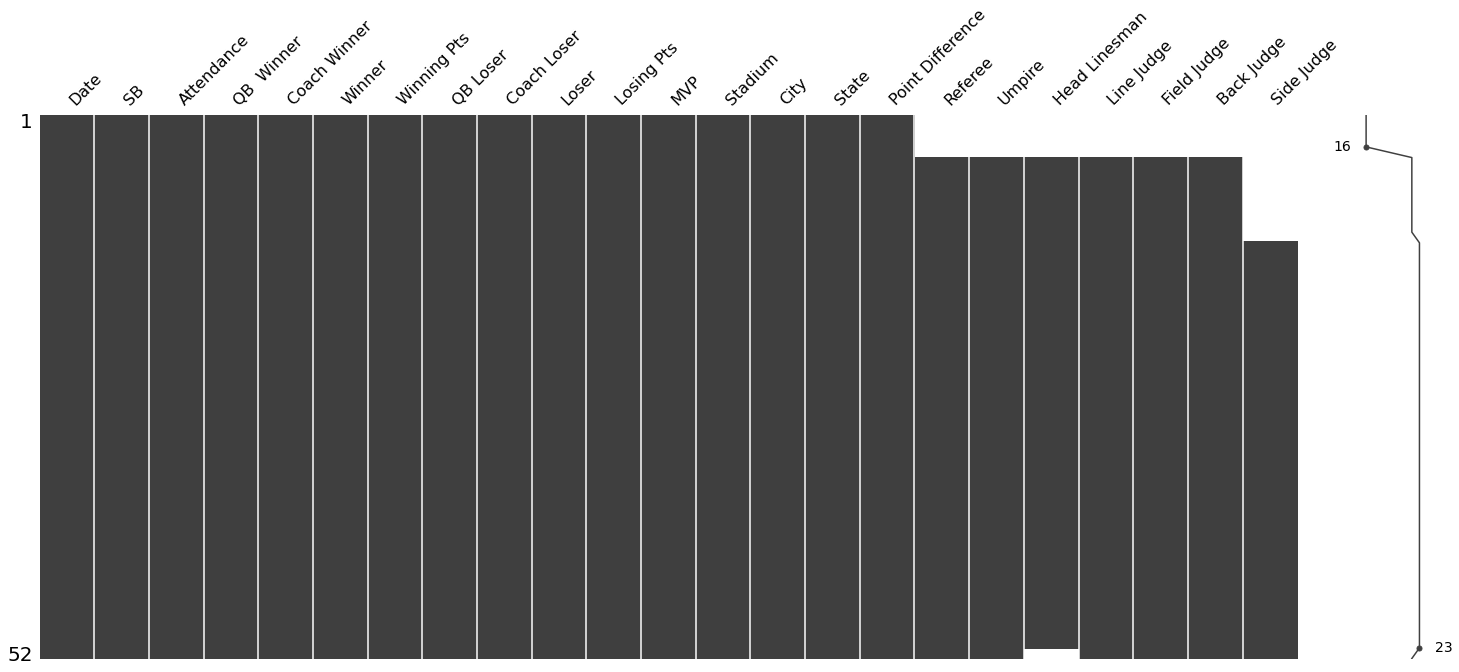

In [ ]:
import missingno 
missingno.matrix(sb)

In [ ]:
sb[sb['Referee'].isna()]

,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,Losing Pts,MVP,Stadium,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,1967-01-15,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,Kansas City Chiefs,10,Bart Starr,Memorial Coliseum,Los Angeles,California,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-01-14,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,Oakland Raiders,14,Bart Starr,Orange Bowl,Miami,Florida,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1969-01-12,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,7,Joe Namath,Orange Bowl,Miami,Florida,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-01-11,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,Minnesota Vikings,7,Len Dawson,Tulane Stadium,New Orleans,Louisiana,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


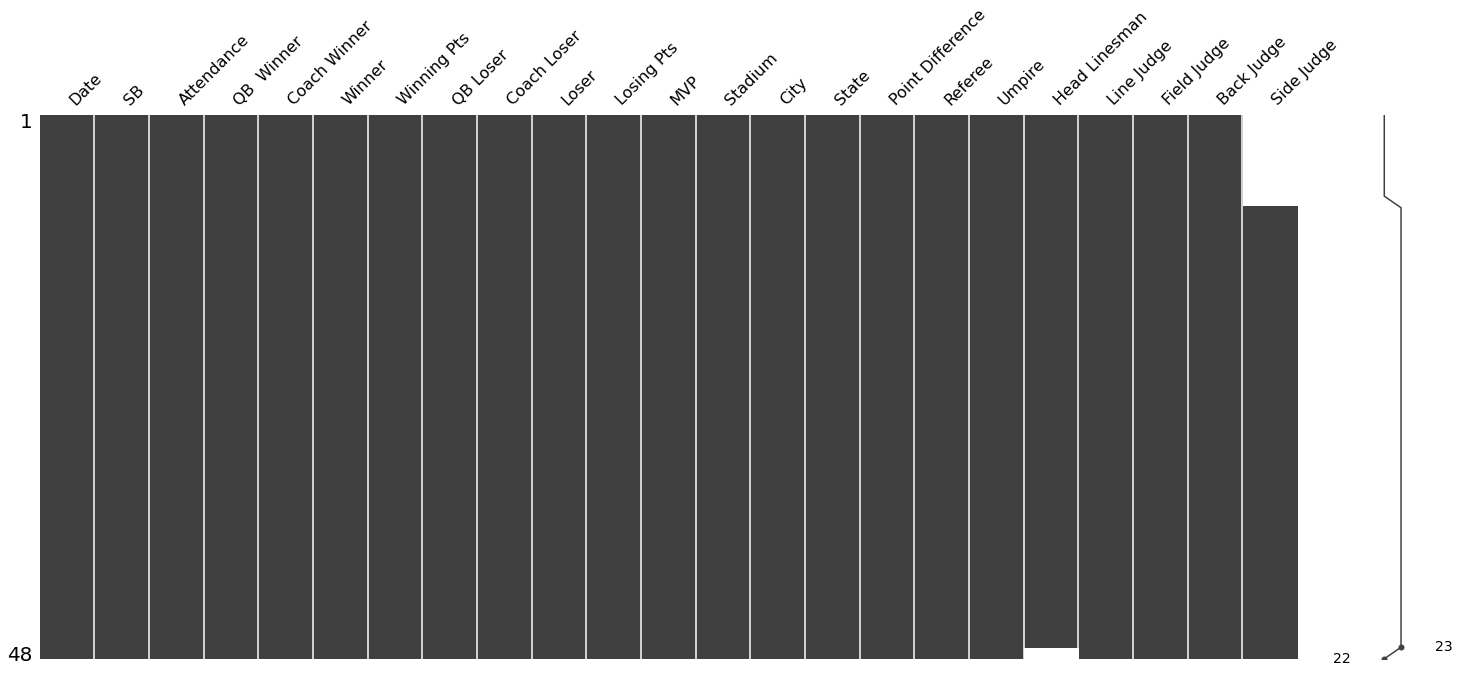

In [ ]:
sb_clean = sb.dropna(subset=['Referee', 'Umpire', 'Head Linesman', 'Line Judge', 'Field Judge',
       'Back Judge'],how='all')
missingno.matrix(sb_clean)

## Outliers

Outliers are values that are extremely higher or lower than all of the other values in that feature. In general, outliers should not be removed unless you have reason to believe it is an error in the dataset. It is important to investigate outliers, as some models are very sensitive to outliers.

**Check for outliers in the numeric columns using df.describe().**


In [ ]:
sb.describe().round(2)

,Attendance,Winning Pts,Losing Pts,Point Difference
count,52.00,52.00,52.00,52.00
mean,77455.94,30.42,16.38,14.04
std,10373.65,9.66,7.31,10.49
min,61946.00,14.00,3.00,1.00
25%,71419.00,23.75,10.00,4.75
50%,74083.00,30.50,17.00,12.00
75%,80280.75,35.00,21.00,19.00
max,103985.00,55.00,33.00,45.00


In [ ]:
# import seaborn as sns
# sns.boxplot(sb_clean,x='Losing Pts')

# Exploratory Data Analysis - Questions to Answer

- For each question, display on the columns required to answer the question.

### Q1. Which 3 Superbowl #'s/years had the largest attendance?


- A1: 


### Q2. Which Stadiums hosted the Superbowl with the largest attendance?

- A2: 

### Q3: What city has hosted the most of superbowls? How many?

- A3:

### Q4: Of all of the superbowls hosted in the city from Q3, which SB # had the lowest attendance?

- A4: 

### Q5: What is the average point difference between teams, for each City? Which city has the highest average Point Difference?

- A5: